In [24]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [26]:
TRAIN_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/train"
TEST_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/test"
VALID_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/valid"
BATCH_SIZE=64

In [27]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 7000 in folder Circle
For training data, found 7000 in folder Hexagon
For training data, found 7000 in folder Pentagon
For training data, found 7000 in folder Square
For training data, found 7000 in folder Star
For training data, found 7000 in folder Triangle


In [28]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1000 in folder Circle
For testing data, found 1000 in folder Hexagon
For testing data, found 1000 in folder Pentagon
For testing data, found 1000 in folder Square
For testing data, found 1000 in folder Star
For testing data, found 1000 in folder Triangle


In [30]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [31]:
class_names = ['Triangle', 'Square', 'Circle', 'Star', 'Pentagon', 'Hexagon']

Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)


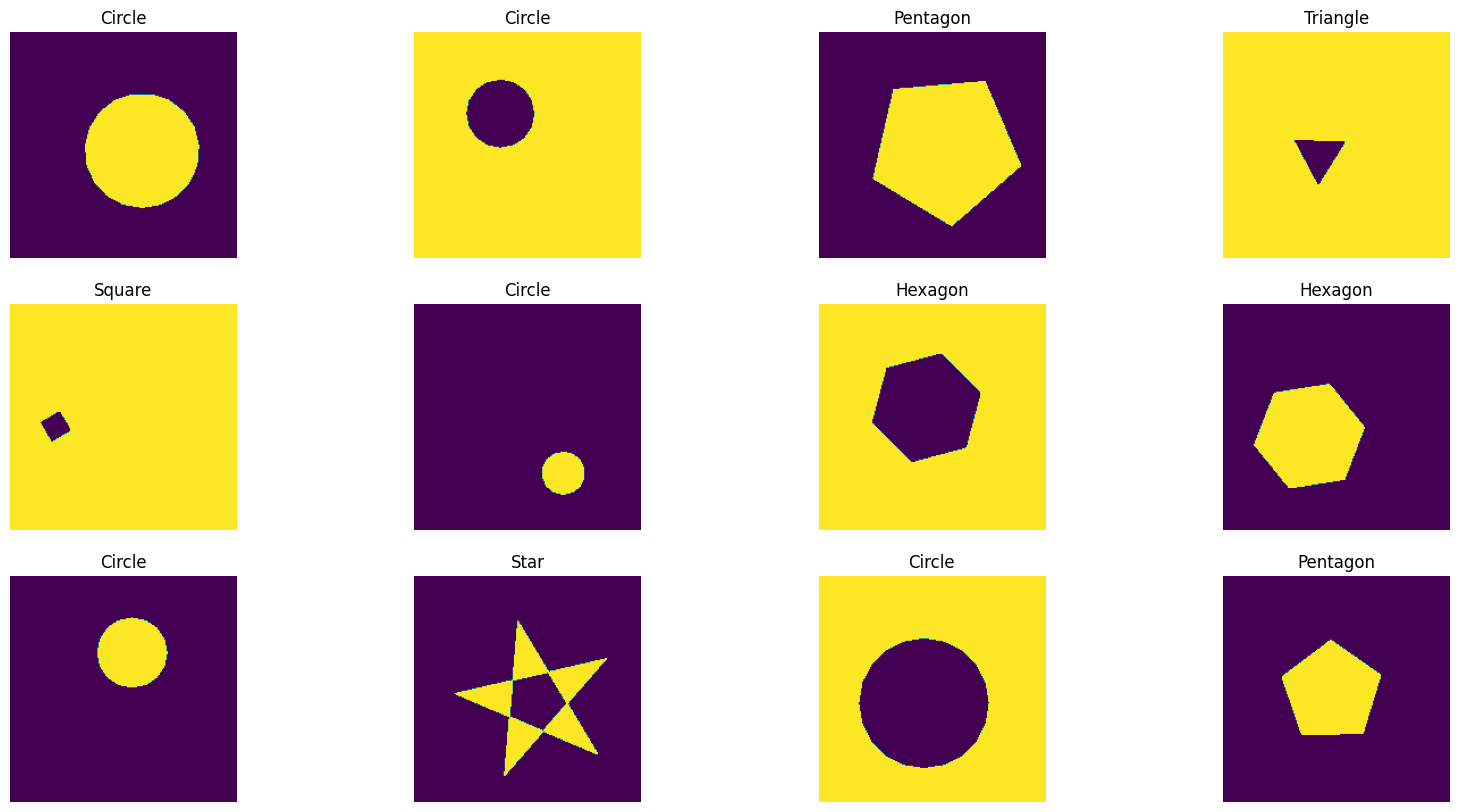

In [32]:
import cv2
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=TEST_DIR+ "/", target_class=class_name)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,target_size = (128, 128),batch_size = BATCH_SIZE,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(VALID_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 42000 images belonging to 6 classes.
Found 6000 images belonging to 6 classes.
Found 12000 images belonging to 6 classes.


In [41]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(48, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(48, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(16, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 8, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
## model summary
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 48)      480       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 48)        20784     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        13856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)       

In [44]:
history = classifier.fit(training_set, epochs = 15,validation_data = valid_set)
classifier.save('model1.h5')

Epoch 1/15
657/657 [==============================] - 556s 846ms/step - loss: 1.3101 - accuracy: 0.4341 - val_loss: 0.8917 - val_accuracy: 0.6160
Epoch 2/15
657/657 [==============================] - 536s 816ms/step - loss: 0.6533 - accuracy: 0.7339 - val_loss: 0.4617 - val_accuracy: 0.8223
Epoch 3/15
657/657 [==============================] - 503s 765ms/step - loss: 0.3546 - accuracy: 0.8635 - val_loss: 0.2852 - val_accuracy: 0.8906
Epoch 4/15
657/657 [==============================] - 509s 775ms/step - loss: 0.2405 - accuracy: 0.9084 - val_loss: 0.2329 - val_accuracy: 0.9100
Epoch 5/15
657/657 [==============================] - 449s 683ms/step - loss: 0.1891 - accuracy: 0.9288 - val_loss: 0.2338 - val_accuracy: 0.9036
Epoch 6/15
657/657 [==============================] - 402s 612ms/step - loss: 0.1596 - accuracy: 0.9389 - val_loss: 0.1798 - val_accuracy: 0.9311
Epoch 7/15
657/657 [==============================] - 401s 610ms/step - loss: 0.1378 - accuracy: 0.9480 - val_loss: 0.1655 -

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
classifier.evaluate(test_set)

94/94 [==============================] - 14s 145ms/step - loss: 0.0846 - accuracy: 0.9695


[0.08460558205842972, 0.9695000052452087]

Text(0, 0.5, 'Loss')

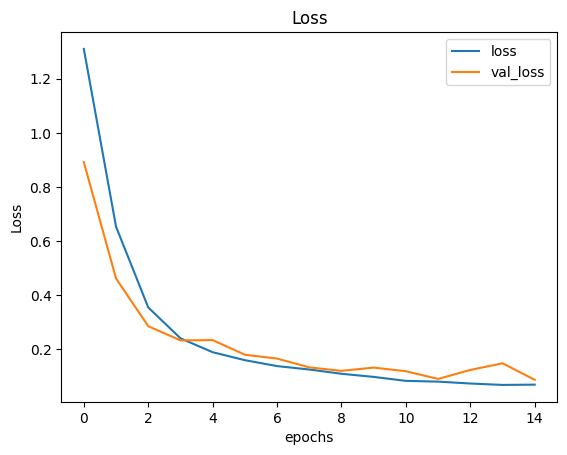

In [46]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

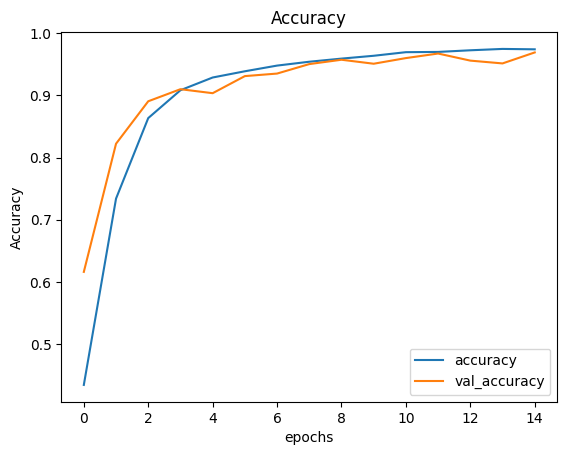

In [47]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')